## MF5

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

%matplotlib inline
warnings.simplefilter('ignore')

# plt.rcParams.update({'font.size': 13,
#                      'xtick.labelsize' : 13,
#                      'ytick.labelsize' : 13})

#### LOAD GLOPAP 

In [4]:
import pandas as pd

#df = pd.read_csv('../KEY_OTHER_ESTUARIES/data_papers/GLODAPv2.2019_Merged_Master_File.csv')
df = pd.read_csv('../KEY_OTHER_ESTUARIES/data_papers/GLODAPv2.2020_Merged_Master_File.csv')



In [5]:
df

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.5670,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.5670,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
2,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.5670,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
3,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.5670,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
4,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.5670,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275553,2106.0,34.0,4.0,2018.0,1.0,24.0,0.0,0.0,-51.0083,57.5867,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1275554,2106.0,34.0,1.0,2018.0,1.0,24.0,0.0,0.0,-51.0083,57.5867,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1275555,2106.0,34.0,1.0,2018.0,1.0,24.0,0.0,0.0,-51.0083,57.5867,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1275556,2106.0,34.0,1.0,2018.0,1.0,24.0,0.0,0.0,-51.0083,57.5867,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0


## 102 columns of the glodap dataset

In [6]:
# display  
data_top = list(df.columns) 
print(data_top)

['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'bottomdepth', 'maxsampdepth', 'bottle', 'pressure', 'depth', 'temperature', 'theta', 'salinity', 'salinityf', 'salinityqc', 'sigma0', 'sigma1', 'sigma2', 'sigma3', 'sigma4', 'gamma', 'oxygen', 'oxygenf', 'oxygenqc', 'aou', 'aouf', 'nitrate', 'nitratef', 'nitrateqc', 'nitrite', 'nitritef', 'silicate', 'silicatef', 'silicateqc', 'phosphate', 'phosphatef', 'phosphateqc', 'tco2', 'tco2f', 'tco2qc', 'talk', 'talkf', 'talkqc', 'fco2', 'fco2f', 'fco2temp', 'phts25p0', 'phts25p0f', 'phtsinsitutp', 'phtsinsitutpf', 'phtsqc', 'cfc11', 'pcfc11', 'cfc11f', 'cfc11qc', 'cfc12', 'pcfc12', 'cfc12f', 'cfc12qc', 'cfc113', 'pcfc113', 'cfc113f', 'cfc113qc', 'ccl4', 'pccl4', 'ccl4f', 'ccl4qc', 'sf6', 'psf6', 'sf6f', 'c13', 'c13f', 'c13qc', 'c14', 'c14f', 'c14err', 'h3', 'h3f', 'h3err', 'he3', 'he3f', 'he3err', 'he', 'hef', 'heerr', 'neon', 'neonf', 'neonerr', 'o18', 'o18f', 'toc', 'tocf', 'doc', 'docf', 'don',

####  take relevant parts of dataframe and make arrays
#### CONVERT DIC AND TA FROM UMOL/KG TO MMOL/M3

In [7]:
#need - bottom depth, pressure, dic, ta, salinity, temp, lat, lon
tALK = np.array(df['talk'][:])
tALK_orig = np.copy(tALK)
tDIC = np.array(df['tco2'][:])
tDIC_orig = np.copy(tDIC)
tSAL = np.array(df['salinity'][:])
tTEMP = np.array(df['temperature'][:])
tPRES = np.array(df['pressure'][:])
tLAT = np.array(df['latitude'][:])
tLON = np.array(df['longitude'][:])
tBOTdepth = np.array(df['bottomdepth'][:])
tYEAR = np.array(df['year'])
tOXY = np.array(df['oxygen'])
#tAOU = np.array(df['aou'][:])

#convert from umol/kg to mmol/m3
import seawater
help(seawater.dens)
dens = seawater.dens(tSAL,tTEMP,tPRES)
tDIC=tDIC*dens/1000
tALK=tALK*dens/1000

tALK_DIC = tALK-tDIC
tALK_DIC2 = tALK-(tDIC+50)

tpcfc11 = np.array(df['pcfc11'][:])
tpcfc12 = np.array(df['pcfc12'][:])
tpsf6 = np.array(df['psf6'][:])

Help on function dens in module seawater.eos80:

dens(s, t, p)
    Density of Sea Water using UNESCO 1983 (EOS 80) polynomial.
    
    Parameters
    ----------
    s(p) : array_like
           salinity [psu (PSS-78)]
    t(p) : array_like
           temperature [℃ (ITS-90)]
    p : array_like
        pressure [db].
    
    Returns
    -------
    dens : array_like
           density  [kg m :sup:`3`]
    
    Examples
    --------
    >>> # Data from Unesco Tech. Paper in Marine Sci. No. 44, p22.
    >>> import seawater as sw
    >>> from seawater.library import T90conv
    >>> s = [0, 0, 0, 0, 35, 35, 35, 35]
    >>> t = T90conv([0, 0, 30, 30, 0, 0, 30, 30])
    >>> p = [0, 10000, 0, 10000, 0, 10000, 0, 10000]
    >>> sw.dens(s, t, p)
    array([  999.842594  ,  1045.33710972,   995.65113374,  1036.03148891,
            1028.10633141,  1070.95838408,  1021.72863949,  1060.55058771])
    
    References
    ----------
    .. [1] Fofonoff, P. and Millard, R.C. Jr UNESCO 1983. Algorith

#### toy code for seeing mag of difference between umol/kg and mmol/m3

In [8]:
#toys

dic_o = 2000
s = 35
t = 7
p = 0
dens2 = seawater.dens(s,t,p)
print('DENSITY:' + str(dens2))
dic_n=dic_o*dens2/1000
print('original umol/kg DIC:' + str(dic_o))
print('new mmol/m DIC:' + str(dic_n))

DENSITY:1027.4188476576678
original umol/kg DIC:2000
new mmol/m DIC:2054.8376953153356


### egleston calculations

In [9]:

def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = np.zeros_like(tdic_A)
    
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC, OmegaA_A

t_omega_DIC, t_beta_DIC, t_gammaDIC, t_OmegaA_A = \
calculate_Egleston_factors\
(tTEMP, tSAL, tALK*1e-3, tDIC*1e-3, tPRES, 0.01)



def calculate_Egleston_factors_tPOT(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = np.zeros_like(tdic_A)
    
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tpot', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tpot', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC, OmegaA_A



##### filters - TA and DIC, TEMP, SAL should exist, depth < 500, TA-DIC conditions, etc

##### filt_comp is a comprehensive filter of everything


In [10]:
#dic, ta, actual reasonable numbers
filt_ALK = ((tALK>-999) & (~np.isnan(tALK)))
filt_DIC = ((tDIC>-999) & (~np.isnan(tDIC)))
filt_SAL = (tSAL >-999) & (~np.isnan(tSAL))
filt_TEMP = (tTEMP >-999) & (~np.isnan(tTEMP))
filt_PRES = (tPRES >-999) & (~np.isnan(tPRES))
filt_EST = (filt_SAL) & (tSAL >= 20 ) & (tPRES < 201)
filt_OXY = (tOXY > -999) & (~np.isnan(tOXY))
#filt_AOU = (tAOU>-999) & (~np.isnan(tAOU))
filt_YEAR = (tYEAR > 2000)
#bottom depth relatively shallow <
filt_DEPTH = (tBOTdepth < 1001) & filt_ALK & filt_DIC & filt_SAL
#year is modern
filt_DEPTH2 = (tBOTdepth < 501) & filt_ALK & filt_DIC & filt_SAL

# filt_comp = filt_DEPTH2& filt_EST & filt_PRES & filt_SAL & filt_TEMP & filt_DIC & filt_ALK

filt_comp = filt_DEPTH2& filt_EST & filt_PRES & filt_SAL & \
filt_TEMP & filt_DIC & filt_ALK  & filt_YEAR #& filt_AOU



filt_ALK_DIC = (np.abs(tALK_DIC) < 50) & (filt_ALK) & (filt_DIC) & (filt_SAL)
filt_ALK_DIC2 = (np.abs(tALK_DIC2) < 50) & (filt_ALK) & (filt_DIC) & (filt_SAL)

filt_cfc = (((tpcfc11>-999) & (~np.isnan(tpcfc11))) | \
               ((tpcfc12>-999) & (~np.isnan(tpcfc12))) | \
               ((tpsf6>-999) & (~np.isnan(tpsf6))) )

filt_comp_cfc = filt_DEPTH2& filt_EST & filt_PRES & filt_SAL & \
filt_TEMP & filt_DIC & filt_ALK  & filt_YEAR & filt_cfc & filt_OXY


print('total_datapoints with DIC measurements')
print(np.shape(filt_DIC))
print('total datapoints with our filt-comp')
print(np.shape(np.where(filt_comp)))
print('total datapoints with our filt-comp-cfc')
print(np.shape(np.where(filt_comp_cfc)))
print('total datapoints with our filt-comp with abs(TA-DIC)<50')
print(np.shape(np.where(filt_comp&filt_ALK_DIC)))
print('total datapoints with our filt-comp with abs(TA-(DIC+50))<50')
print(np.shape(np.where(filt_comp&filt_ALK_DIC2)))

total_datapoints with DIC measurements
(1275558,)
total datapoints with our filt-comp
(1, 14098)
total datapoints with our filt-comp-cfc
(1, 2556)
total datapoints with our filt-comp with abs(TA-DIC)<50
(1, 827)
total datapoints with our filt-comp with abs(TA-(DIC+50))<50
(1, 2577)


In [11]:
# tpcfc12[tpcfc12<-999] = np.nan
# plt.plot(tLON[filt_comp_cfc],tpcfc12[filt_comp_cfc],'r*')

max difference in mmol/umol stuff
18.93609824732266
mean difference in mmol/umol stuff
-4.200759058330788


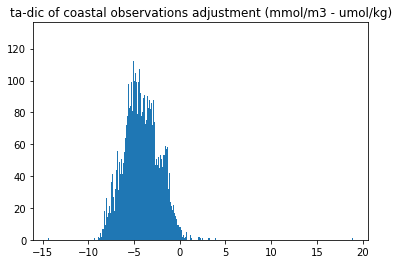

In [12]:
#how different is conversion
dic_fc_mmolm3 = tDIC[filt_comp] - tALK[[filt_comp]]
dic_fc_umolkg = tDIC_orig[filt_comp] - tALK_orig[[filt_comp]]
dif = dic_fc_mmolm3 - dic_fc_umolkg
print('max difference in mmol/umol stuff')
print(np.max(dif))
print('mean difference in mmol/umol stuff')
print(np.mean(dif))

plt.hist(dif, bins=1000)
plt.title('ta-dic of coastal observations adjustment (mmol/m3 - umol/kg)')
plt.show()

### manually assign geolocations

In [13]:
tGEO = np.zeros_like(tBOTdepth)

#canadian arctic
westlon = -148; eastlon = -50; southlat = 60; northlat = 85
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 1
print(np.shape(tGEO[tGEO==1]))
#euro arctic
westlon = -30; eastlon = 91; southlat = 70; northlat = 85
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 2
#atlantic 1
westlon = -50; eastlon = 30; southlat = 0; northlat = 70
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
#atlantic 2
westlon = -100; eastlon = -50; southlat = 0; northlat = 60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
#siberian arctic
westlon = 91; eastlon = 180; southlat = 68; northlat = 91
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 4
#pacific coast
westlon = -140; eastlon = -100; southlat = 10; northlat = 60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 5
#Russian-Alaskan Interface
westlon = -180; eastlon = -148; southlat = 50; northlat = 90
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 6
#Kamchatka Region
westlon = 120; eastlon = 180; southlat = 48; northlat = 68
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 7
#Japan and China
westlon = 120; eastlon = 180; southlat = 10; northlat = 48
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 8
#SO
westlon = -180; eastlon = 180; southlat = -90; northlat = -60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 9

(33641,)


In [14]:
PLACES_withdat = {
'Canadian Arctic': { 'geodat': 1, 'colour': 'blueviolet', 'name':'Canadian Arctic'},
'European Arctic': { 'geodat': 2, 'colour': 'darkorange', 'name':'European Arctic'},
'N. Atlantic': { 'geodat': 3, 'colour': 'red', 'name':'N. Atlantic'},
'Siberian Arctic': { 'geodat': 4, 'colour': 'dodgerblue', 'name':'Siberian Arctic'},
'Coastal Pacific': { 'geodat': 5, 'colour': 'blue', 'name':'Coastal Pacific'},
'Russian/Alaskan Interface': { 'geodat': 6, 'colour': 'skyblue', 'name':'Russian/Alaskan \n Interface'},
'Kamchatka Region': { 'geodat': 7, 'colour': 'lightsteelblue', 'name':'Kamchatka Region'},
'China/Japan': { 'geodat': 8, 'colour': 'steelblue', 'name':'China/Japan'},
'Southern Ocean': { 'geodat': 9, 'colour': 'green', 'name':'Southern Ocean'},
'Everything Else': { 'geodat': 0, 'colour': 'grey', 'name':'Everything Else'},
}

list_places = ['Everything Else','Canadian Arctic','European Arctic',
'N. Atlantic','Siberian Arctic','Coastal Pacific',
'Russian/Alaskan Interface',
'Kamchatka Region','China/Japan',
'Southern Ocean',]

print(list_places)

['Everything Else', 'Canadian Arctic', 'European Arctic', 'N. Atlantic', 'Siberian Arctic', 'Coastal Pacific', 'Russian/Alaskan Interface', 'Kamchatka Region', 'China/Japan', 'Southern Ocean']


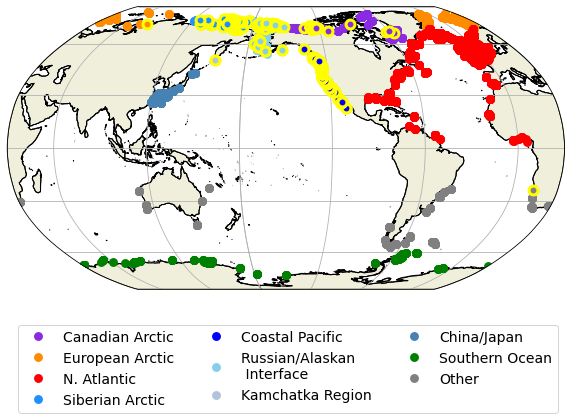

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

fact = 1.5
fig = plt.figure(figsize=(6.66*fact, 6.66*fact))


lons = [214.5, 2.7, 197.5]                                                                                               
lats = [35, 36, 37.]

ax = plt.axes(projection=ccrs.Robinson(
    central_longitude=-150))
# plot lat/lon points                                                                                                         

# add coastlines for reference    

ms = 8.9
for i in range(1,10):
    

    tpl = list_places[i]
    this_lon = tLON[filt_comp& (tGEO == i)]
    this_lat = tLAT[filt_comp& (tGEO == i)]
    ax.plot(this_lon, this_lat, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = None, markeredgewidth = 0, linestyle = '',\
           label = PLACES_withdat[tpl]['name'],
        transform=ccrs.Geodetic())
    
    this_lon = tLON[filt_comp& (tGEO == i)&filt_ALK_DIC]
    this_lat = tLAT[filt_comp& (tGEO == i)&filt_ALK_DIC]
    ax.plot(this_lon, this_lat, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = 'yellow', markeredgewidth = 3, linestyle = '',\
            transform=ccrs.Geodetic())

for i in range(0,1):
    

    tpl = list_places[i]
    this_lon = tLON[filt_comp& (tGEO == i)]
    this_lat = tLAT[filt_comp& (tGEO == i)]
    ax.plot(this_lon, this_lat, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = None, markeredgewidth = 0, linestyle = '',\
           label = 'Other',
        transform=ccrs.Geodetic())
    
    this_lon = tLON[filt_comp& (tGEO == i)&filt_ALK_DIC]
    this_lat = tLAT[filt_comp& (tGEO == i)&filt_ALK_DIC]
    ax.plot(this_lon, this_lat, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = 'yellow', markeredgewidth = 3, linestyle = '',\
            transform=ccrs.Geodetic())
 
#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.coastlines(resolution='50m')
ax.set_global()
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)
ax.legend(bbox_to_anchor = [1.00, -0.1], ncol = 3, fontsize = 14)
plt.show()

In [ ]:
BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))  
BR3_TA_winter = pickle.load(open('../pkls/BR3_TA_winter_mean.pkl', 'rb'))  
BR3_TA_summer = pickle.load(open('../pkls/BR3_TA_summer_mean.pkl', 'rb'))  

mask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
lmask = mask['tmask'][0,:,:,:]

summer_TA_DIC_BR3 = BR3_TA_summer-BR3_DIC_summer
winter_TA_DIC_BR3 = BR3_TA_winter-BR3_DIC_winter

omega_DIC_summer = pickle.load(open('../pkls/omega_DIC_summer_mean.pkl', 'rb')) 
omega_A_summer = pickle.load(open('../pkls/omega_A_summer_mean.pkl', 'rb')) 
omega_DIC_winter = pickle.load(open('../pkls/omega_DIC_winter_mean.pkl', 'rb')) 
omega_A_winter = pickle.load(open('../pkls/omega_A_winter_mean.pkl', 'rb')) 


csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_DIC_summer > 1e10 ] = 0
csize2 = np.concatenate((csize,csize), axis = 0 )
csize2[np.isnan(csize2)] = 0

year_TA_DIC = np.concatenate((summer_TA_DIC_BR3,winter_TA_DIC_BR3),axis=0)
year_omega_DIC = np.concatenate((omega_DIC_summer,omega_DIC_winter),axis=0)
year_omega_A = np.concatenate((omega_A_summer,omega_A_winter),axis=0)
year_omega_A[year_omega_A>1e10] = 0
year_omega_DIC[year_omega_DIC ==  np.inf] = 0
year_omega_DIC = -1*year_omega_DIC

In [ ]:
# np.histogram(year_omega_A)

In [ ]:

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

fact = 0.9
fig = plt.figure(figsize=(19/2.54,27/2.54*.6),dpi = 300)
fs = 12
tcol = 'black'
tlw = 4.5
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
##############################



############################
ax6 = plt.subplot(3,1,1)
ax6.set_title(r'Distribution of [TA-DIC] in global coastal observations, coloured by region', fontsize = fs)
ax6.set_ylabel('prop. of obs.', fontsize = fs)
ax6.set_xlabel('[TA-DIC] (mmol m$^{-3}$)', fontsize = fs)
ax6.set_xlim(-100,400)
#histogram of omega A:
nbins = 50
hist_stor = np.zeros([len(list_places),nbins])

for i in range(0,len(list_places)):
#     filt_comp = filt_DEPTH2& filt_EST & (tGEO == i) \
#     & filt_SAL & filt_TEMP & filt_DIC & filt_ALK
    
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = tALK_DIC[filt_comp & (tGEO == i)]
    hist_Omega, bins = np.histogram(w, bins=nbins, range = [-100, 400])
    hist_stor[i,:] = hist_Omega
    
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])

#year_TA_DIC = np.concatenate((summer_TA_DIC_BR3,winter_TA_DIC_BR3),axis=0)
#csize2 = np.concatenate((csize,csize), axis = 0 )
hist_year_TA_DIC, bins = np.histogram(year_TA_DIC, \
bins=nbins, range = [-100, 400], weights=csize2)
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_year_TA_DIC/np.sum(hist_year_TA_DIC),\
         color = tcol, lw = tlw,label = 'BR - winter mean')
ax6.grid()
    
    
ax6 = plt.subplot(3,1,2)
ax6.set_title(r'Distribution of $\Omega_{arag}$ in global coastal observations, coloured by region', fontsize = fs)
ax6.set_ylabel('prop. of obs.', fontsize = fs)
ax6.set_xlabel('$\Omega_{arag}$', fontsize = fs)
ax6.set_ylim(0.0,0.2)
ax6.set_xlim(0.0,3)

#histogram of omega:
nbins = 50
hist_stor = np.zeros([len(list_places),50])
print(np.shape(hist_stor))

for i in range(0,len(list_places)):
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = t_OmegaA_A[filt_DEPTH2& filt_EST & (tGEO == tGEODAT) & filt_SAL & filt_TEMP & filt_DIC & filt_ALK]
    hist_Omega, bins = np.histogram(w, bins=nbins, range = [0, 3])
    hist_stor[i,:] = hist_Omega
    
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])


hist_year_omega_A, bins = np.histogram(year_omega_A[year_omega_A>0], \
                                       bins=nbins, range = [0, 3], \
                                       weights=csize2[year_omega_A>0])
tot_count = np.sum(hist_year_omega_A)
ax6.plot(bin_cent[0:nbins],hist_year_omega_A/tot_count, color = tcol, lw = tlw,\
         label = 'BR - winter mean')
ax6.grid()
ax6.axvline(x=1, color = 'k')

############################
ax6 = plt.subplot(3,1,3)
ax6.set_title(r'Distribution of -$\omega_{DIC}$ in global coastal observations, coloured by region', fontsize = fs)
ax6.set_ylabel('prop. of obs.', fontsize = fs)
ax6.set_xlabel('$-\omega_{DIC}$ ($\mu M$)', fontsize = fs)
#ax6.set_ylabel('proportion')
ax6.set_ylim(0.0,0.45)
#histogram of omega DIC:
nbins = 50
hist_stor = np.zeros([len(list_places),nbins])
print(np.shape(hist_stor))




for i in range(0,len(list_places)):
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = t_omega_DIC[filt_DEPTH2& filt_EST & (tGEO == tGEODAT) & filt_SAL & filt_TEMP & filt_DIC & filt_ALK]
    hist_Omega, bins = np.histogram(-1 * w, bins=nbins, range = [0, 0.5])
    hist_stor[i,:] = hist_Omega
    
 
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(1000*bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])

    
hist_year_omega_DIC, bins = np.histogram(year_omega_DIC[year_omega_DIC>0], bins=nbins, range = [0, 0.5], weights=csize2[year_omega_DIC>0])

bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(1000*bin_cent[0:nbins],hist_year_omega_DIC/np.sum(hist_year_omega_DIC), \
             color = tcol, lw = tlw)
ax6.grid()
plt.tight_layout()
#plt.savefig('Fig5_c-e.jpg')

## calculating BR3 oma, oma_dic and pickling

# convert salinity from g/kg, make sure to use potential temperature T option and convert cons T to pot T

In [ ]:
# import gsw

# tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# dic_s = np.ravel(pickle.load(open(tdir+'BR3_DIC_summer_mean.pkl', 'rb')))
# dic_s[dic_s == 0] = np.nan
# #ta_s = pickle.load(')
# ta_s = np.ravel(pickle.load(open(tdir+'BR3_TA_summer_mean.pkl', 'rb')))
# print(np.shape(ta_s))
# ta_s[ta_s> 1e5] = np.nan
# ta_s[dic_s == 0] = np.nan
# dic_s = np.ravel(pickle.load(open(tdir+'BR3_DIC_summer_mean.pkl', 'rb')))
# dic_s[dic_s == 0] = np.nan
# temp_s = np.ravel(pickle.load(open(tdir+'BR3_temp_summer_mean.pkl', 'rb')))
# temp_s[temp_s> 1e5] = np.nan
# temp_s[dic_s == 0] = np.nan
# sal_s = np.ravel(pickle.load(open(tdir+'BR3_sal_summer_mean.pkl', 'rb')))
# #from g/kg to psu 
# temp_s = gsw.pt_from_CT(sal_s,temp_s)

# sal_s= sal_s*35/35.16504



# sal_s[sal_s> 1e5] = np.nan
# sal_s[dic_s == 0] = np.nan

# tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'

# #ta_w = pickle.load(')
# dic_w = np.ravel(pickle.load(open(tdir+'BR3_DIC_winter_mean.pkl', 'rb')))
# dic_w[dic_w > 1e5] = np.nan
# dic_w[dic_w == 0] = np.nan

# ta_w = np.ravel(pickle.load(open(tdir+'BR3_TA_winter_mean.pkl', 'rb')))
# print(np.shape(ta_w))
# ta_w[ta_w> 1e5] = np.nan
# ta_w[dic_w == 0] = np.nan

# temp_w = np.ravel(pickle.load(open(tdir+'BR3_temp_winter_mean.pkl', 'rb')))
# temp_w[temp_w> 1e5] = np.nan
# temp_w[dic_w == 0] = np.nan
# sal_w = np.ravel(pickle.load(open(tdir+'BR3_sal_winter_mean.pkl', 'rb')))
# #from g/kg to psu 
# #convert to pt from CT
# temp_w = gsw.pt_from_CT(sal_w,temp_w)

# sal_w= sal_w*35/35.16504
# sal_w[sal_w> 1e5] = np.nan
# sal_w[dic_w == 0] = np.nan


# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# dep = np.ravel((w['gdept_0'][0,:,:,:]))

# #print(ta_s[0,250,250])
# #salish sea summer
# sss_omega_DIC, sss_beta_DIC, sss_gammaDIC, sss_OmegaA_A = \
# calculate_Egleston_factors_tPOT\
# (temp_s, sal_s, ta_s*1e-3, dic_s*1e-3, dep, 0.01)

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# dep = np.ravel((w['gdept_0'][0,:,:,:]))

# #print(ta_s[0,250,250])
# #salish sea summer
# ssw_omega_DIC, ssw_beta_DIC, ssw_gammaDIC, ssw_OmegaA_A = \
# calculate_Egleston_factors_tPOT\
# (temp_w, sal_w, ta_w*1e-3, dic_w*1e-3, dep, 0.01)

# sss_omega_DIC2 = sss_omega_DIC.reshape(40,898,398)
# print(sss_omega_DIC2[0,250,250])
# pickle.dump(sss_omega_DIC2, open("../pkls/omega_DIC_summer_mean.pkl", 'wb'))
# sss_OmegaA_A2 = sss_OmegaA_A.reshape(40,898,398)
# print(sss_OmegaA_A2[0,250,250])
# pickle.dump(sss_OmegaA_A2, open("../pkls/omega_A_summer_mean.pkl", 'wb'))

# ssw_omega_DIC2 = ssw_omega_DIC.reshape(40,898,398)
# print(ssw_omega_DIC2[0,250,250])
# pickle.dump(ssw_omega_DIC2, open("../pkls/omega_DIC_winter_mean.pkl", 'wb'))
# ssw_OmegaA_A2 = ssw_OmegaA_A.reshape(40,898,398)
# print(ssw_OmegaA_A2[0,250,250])
# pickle.dump(ssw_OmegaA_A2, open("../pkls/omega_A_winter_mean.pkl", 'wb'))


## summer and winter mean temps BR3 (commented out)

In [ ]:
# import glob
# #summer mean calc
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# t_sum = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tdat = \
#     glob.glob('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_*grid_T*'+ymd+'.nc')
#     w = nc.Dataset(tdat[0])
#     ttemp = w['votemper'][:,:,:]
#     t_sum[i,:,:,:] = ttemp
    
# t_sum_m = np.nanmean(t_sum,axis=0)
# pickle.dump(t_sum_m, open("../pkls/BR3_temp_summer_mean.pkl", 'wb'))
# print(np.shape(t_sum_m))

# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tdat = \
#     glob.glob('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_*grid_T*'+ymd+'.nc')
#     w = nc.Dataset(tdat[0])
#     ttemp = w['votemper'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = ttemp

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     glob.glob('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_*grid_T*'+ymd+'.nc')
#     w = nc.Dataset(tdat[0])
#     ttemp = w['votemper'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = ttemp

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/BR3_temp_winter_mean.pkl", 'wb'))

